In [ ]:
# Predicting whether a given passenger will survive on the titanic or not

importing Libraries

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
Titanic = sns.load_dataset('titanic')

In [ ]:
Titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# checking the distribution of the dataset
Titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
type(Titanic)

pandas.core.frame.DataFrame

In [ ]:
# Counting the rows and columns of the dataset
rows, column = Titanic.shape

In [ ]:
column

15

In [ ]:
# Counting the number of people survived
Titanic['survived'].value_counts()


0    549
1    342
Name: survived, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


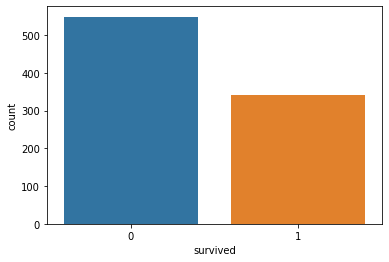

In [ ]:
# visualize the survivors with COUNTPLOT
sns.countplot(Titanic['survived'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Unrecognized location 'upper_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/

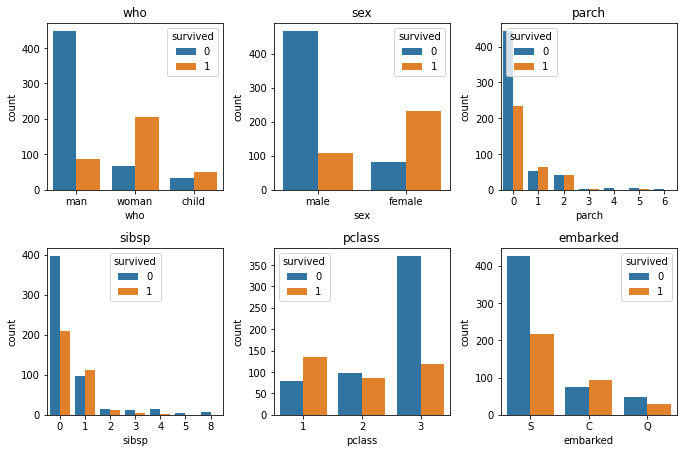

In [ ]:
# Visualizing all the values like 'who', 'sex', 'parch','sibsp', 'pclass','embarked'

# making a column for the same
cols = ['who', 'sex', 'parch','sibsp', 'pclass','embarked']

# defining the shape of the subplot grid
n_rows = 2
n_col = 3 

# the subplot grid and the size of individual plots.
fig,axs =plt.subplots(n_rows,n_col,figsize = (3.2*n_col,3.2*n_rows))

for r in range(n_rows):
  for c in range(n_col):
    i = r*n_col + c # index of individual graph locations
    ax = axs[r][c] # position of each subplot
    sns.countplot(Titanic[cols[i]], hue =Titanic['survived'], ax =ax)
    ax.set_title(cols[i])
    ax.legend(title ='survived', loc = 'upper_right')


plt.tight_layout()    


In [ ]:
# looking at the survival rate by sex 
Titanic.groupby('sex')[['survived']].mean() # this will group the survivors on the bases of their sex and give the mean value

,survived
sex,
female,0.742038
male,0.188908


In [ ]:
# look survival rate by sex and class
Titanic.pivot_table('survived', index ='sex', columns = 'class') # index will define the rows and columns will define columns

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


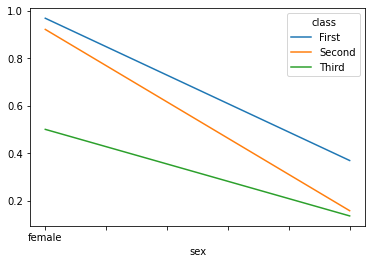

In [ ]:
# using pivot table to visualize the class visually 
Titanic.pivot_table('survived', index ='sex', columns = 'class').plot()

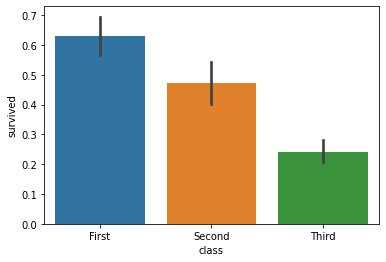

In [ ]:
# plotting the survival rate by class
sns.barplot(x = 'class', y = 'survived', data = Titanic)

In [ ]:
# survival rate by age , sex and class
age = pd.cut(Titanic['age'], [0,18,80]) # split the age column in 0-18 and 18-20
Titanic.pivot_table('survived', ['sex' ,age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

<function matplotlib.pyplot.show>

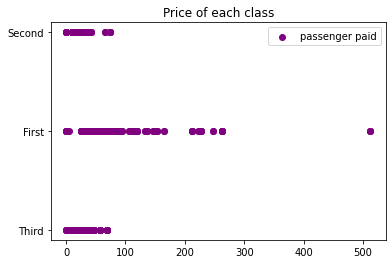

In [ ]:
# prices paid by each class
plt.scatter(Titanic["fare"], Titanic["class"], color = 'purple',label = 'passenger paid')
plt.xlabel = ('class')
plt.ylabel = ('Price/fare')
plt.title('Price of each class')
plt.legend()
plt.show

In [ ]:
# count the empty values in each columns 
# this done to redudant
Titanic.isna().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Since there are a lot of missing values in the age and embarked columns so it better to drop these columns altogether


In [ ]:
# look at all the values in each column & get a count
# this done to redudant

for val in Titanic:
  print(Titanic[val].value_counts())
  # print()

0    549
1    342
Name: survived, dtype: int64
3    491
1    216
2    184
Name: pclass, dtype: int64
male      577
female    314
Name: sex, dtype: int64
24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: fare, Length: 248, dtype: int64
S    644
C    168
Q     77
Name: embarked, dtype: int64
Third     491
First     216
Second    184
Name: class, dtype: int64
man      537
woman    271
child     83
Name: who, dtype: int64
True     537
False    354
Name: adult_male, dtype: int64
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: dec

In [ ]:
# dropping the columns
Titanic = Titanic.drop(['deck','embark_town', 'alive', 'class','who','alone','adult_male'], axis =1)

#Remove the rows with missing values
Titanic = Titanic.dropna(subset = ['embarked', 'age'])

In [ ]:
# looking at the shape of the new dataset
Titanic.shape

(712, 8)

In [ ]:
Titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [ ]:
# since two datatypes , we are changing the datatytpe using sklearn
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# encode the sex value
Titanic.iloc[:,2 ] = labelencoder.fit_transform(Titanic.iloc[:,2].values)


# Encode the embarked value
Titanic.iloc[:,7 ] = labelencoder.fit_transform(Titanic.iloc[:,7].values)

In [ ]:
Titanic.dtypes

survived      int64
pclass        int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int64
dtype: object

In [ ]:
# splitting the data into labels 'X' and feature 'Y' datasets
X = Titanic.iloc[:,1:8].values
Y = Titanic.iloc[:,0].values

In [ ]:
# Splitting the dataset into test and train
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state =0)

In [ ]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
#creating a function which incorporates a lot of algorithms
def models(X_train,Y_train):

  # Logistic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression()
  log.fit(X_train,Y_train)


  # Use Kneighbors
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors =5 , metric = 'minkowski', p =2) # metric minkowski and p = 2 ensures eucledian distance betrween the numbers
  knn.fit(X_train,Y_train)

  # Use SVC (linear_kernel)
  from sklearn.svm import SVC 
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train,Y_train)

  # use SVC (RBF kernel)
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state =0)
  svc_rbf.fit(X_train,Y_train)

  # use gaussianNB
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train,Y_train)

  # use Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train,Y_train)

  # Use Randomforest
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators =10 , criterion = 'entropy' , random_state = 0)
  forest.fit(X_train,Y_train)

  # print the training accuracy of each model
  print('[0]LogisticRegression training accuracy: ', log.score(X_train,Y_train))
  print('[1]Kneighbors training accuracy: ' ,knn.score(X_train,Y_train))
  print('[2]SVC linear training accuracy: ' ,svc_lin.score(X_train,Y_train))
  print('[3]SVC rbg training accuracy: ' ,svc_rbf.score(X_train,Y_train))
  print('[4]gauss training accuracy: ', gauss.score(X_train,Y_train))
  print('[5]decison tree training accuracy: ', tree.score(X_train,Y_train))
  print('[6]random forest training accuracy: ', forest.score(X_train,Y_train))
  

  return log,knn,svc_lin ,svc_rbf,gauss,tree,forest

In [ ]:
# get and train all the models
model = models(X_train,Y_train)

[0]LogisticRegression training accuracy:  0.7978910369068541
[1]Kneighbors training accuracy:  0.8664323374340949
[2]SVC linear training accuracy:  0.7768014059753954
[3]SVC rbg training accuracy:  0.8506151142355008
[4]gauss training accuracy:  0.8031634446397188
[5]decison tree training accuracy:  0.9929701230228472
[6]random forest training accuracy:  0.9753954305799648


In [ ]:
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
  # print(model[i])
  cm = confusion_matrix(Y_test , model[i].predict(X_test))

  # extract the true negative ,false positive, false negative, true positive
  TN, FP,FN,TP = confusion_matrix(Y_test , model[i].predict(X_test)).ravel()

  test_score = (TP +TN )/ (TN +TP +FP +FN)
  print(cm)
  print('Model[{}] testing accuracy = "{}"'.format(i,test_score ))
  print()


[[75  7]
 [19 42]]
Model[0] testing accuracy = "0.8181818181818182"

[[67 15]
 [20 41]]
Model[1] testing accuracy = "0.7552447552447552"

[[70 12]
 [18 43]]
Model[2] testing accuracy = "0.7902097902097902"

[[75  7]
 [22 39]]
Model[3] testing accuracy = "0.7972027972027972"

[[69 13]
 [27 34]]
Model[4] testing accuracy = "0.7202797202797203"

[[54 28]
 [12 49]]
Model[5] testing accuracy = "0.7202797202797203"

[[73  9]
 [14 47]]
Model[6] testing accuracy = "0.8391608391608392"



In [ ]:
# getting feature importance

forest = model[6]
importances = pd.DataFrame({'feature': Titanic.iloc[:, 1:8].columns, 'importance' : np.round(forest.feature_importances_ , 3)})
importances = importances.sort_values('importance', ascending = False).set_index('feature')
importances

,importance
feature,
age,0.300
fare,0.296
sex,0.183
pclass,0.098
sibsp,0.050
parch,0.044
embarked,0.030


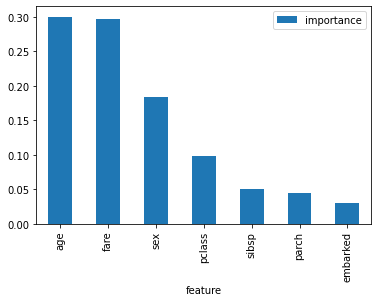

In [ ]:
# Visualize the importances
importances.plot.bar()

In [ ]:
# print the prediction of the randomforestclassifier model
pred = model[6].predict(X_test)
print(pred)
print()


# print the actual values
print(Y_test)

[1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [65]:
# predicting whether i will survive
my_survival = [[1,0,66,4,2,220,1]]

# scaling my survival
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
my_survival_scaled = sc.fit_transform(my_survival)

# print prediction using random forest
pred = model[6].predict(my_survival_scaled)

if pred == 0:
  print('you will accompany jack!!')
else:
  print('Rose will be waiting there')


you will accompany jack!!
